In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\jaylo\OneDrive\Documents\Data Science Course Project\bitstamp_2012-0101-now_usd.csv")

#cleaning the data, including 1. converting Unix time to date. 2. get rid of the NaN values for more accuracy and reduce data size. 3. summing minutes into days
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data['Timestamp'] = data['Timestamp'].dt.date

data = data.groupby('Timestamp',as_index=False).mean()
data.to_csv(r'C:\Users\jaylo\OneDrive\Documents\Data Science Course Project\bitcoin_data_cleaned.csv', index = False)

In [3]:
#re-read the cleaned data
data = pd.read_csv(r"C:\Users\jaylo\OneDrive\Documents\Data Science Course Project\bitcoin_data_cleaned.csv")

data.head()
#splitting training and testing datasets


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


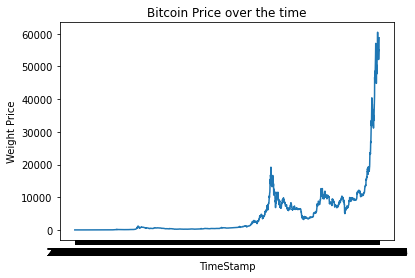

Text(0, 0.5, 'Weighted Price')

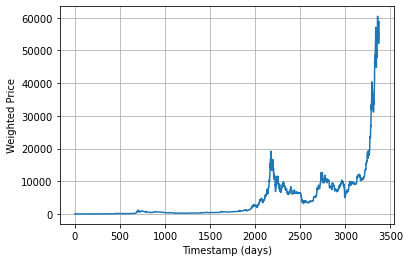

In [4]:
plt.plot(data.Timestamp, data.Weighted_Price)
plt.xlabel("TimeStamp")
plt.ylabel("Weight Price")
plt.title("Bitcoin Price over the time")
plt.show()

weighted_price = data.Weighted_Price
weighted_price.plot(grid=True)
plt.xlabel("Timestamp (days)")
plt.ylabel("Weighted Price")

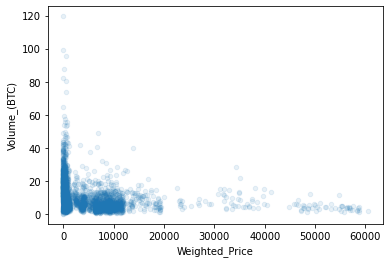

In [5]:
data.plot(kind = "scatter", x="Weighted_Price", y = "Volume_(BTC)", alpha=0.1)
plt.show()

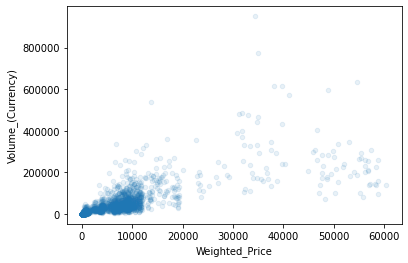

In [6]:
data.plot(kind = "scatter", x="Weighted_Price", y = "Volume_(Currency)", alpha=0.1)
plt.show()

In [7]:
data.shape

(3376, 8)

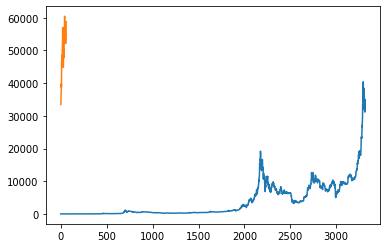

In [12]:
#spliting the dataset
days = 60
price_all = pd.DataFrame(weighted_price).values
#2d npy array
train = price_all[:-days]
test = price_all[len(price_all)-days:]

# #visualize the 2 sets
plt.plot(train)
plt.plot(test)

In [162]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler

x_train = []
y_train = []
df_x = []
df_y = []

scaler = MinMaxScaler()
#rescale the range of training data to [0,1]
train_scale = scaler.fit_transform(train)

#split x_train, y_train
temp = 60
for i in range (temp, train_scale.shape[0]):
    x_train.append(train_scale[i-temp:i])
    y_train.append(train_scale[i,0])
    
#split x_test_dataset and y_test_dataset with 90 timesets
for i in range (90, train_scale.shape[0]):
    df_x.append(train_scale[i-60:i])
    df_y.append(train_scale[i])

df_x = np.array(df_x)
df_y = np.array(df_y)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = df_x[df_x.shape[0]-30:]
y_test = df_y[df_x.shape[0]-30:]
y_test
#x_train.shape[0]

array([[0.72502452],
       [0.76138418],
       [0.82847662],
       [0.78858559],
       [0.79890881],
       [0.86406953],
       [0.94236532],
       [0.9854481 ],
       [1.        ],
       [0.98345939],
       [0.84852432],
       [0.86246652],
       [0.85834988],
       [0.95328386],
       [0.92753486],
       [0.91205436],
       [0.8825332 ],
       [0.89232272],
       [0.91244445],
       [0.87020307],
       [0.81564481],
       [0.78870777],
       [0.80085792],
       [0.79771998],
       [0.82564735],
       [0.79207891],
       [0.77108906],
       [0.7870447 ],
       [0.86769584],
       [0.84299345]])

In [49]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Flatten, TimeDistributed, LSTM, Dropout
#initialize the RNN
regressor = Sequential()

#first layer of LSTM and dropout value
regressor.add(SimpleRNN(units = 70, activation = 'tanh', return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#first layer of LSTM and dropout value
regressor.add(SimpleRNN(units = 80, activation = 'tanh', return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#first layer of LSTM and dropout value
regressor.add(SimpleRNN(units = 90, activation = 'tanh', return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#first layer of LSTM and dropout value
regressor.add(SimpleRNN(units = 100, activation = 'tanh', return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 70)            5040      
                                                                 
 dropout_30 (Dropout)        (None, 60, 70)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 80)            12080     
                                                                 
 dropout_31 (Dropout)        (None, 60, 80)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 90)            15390     
                                                                 
 dropout_32 (Dropout)        (None, 60, 90)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 60, 100)         

In [51]:
#training set fitting to the neural network model
epoch = 25
batch_size = 15

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
model = regressor.fit(x_train, y_train, epochs = 20, batch_size = 2, validation_split=0.1)

Epoch 1/20
1465/1465 [==============================] - 70s 45ms/step - loss: 0.0157 - val_loss: 0.0542
Epoch 2/20
1465/1465 [==============================] - 67s 46ms/step - loss: 0.0072 - val_loss: 0.0509
Epoch 3/20
1465/1465 [==============================] - 62s 42ms/step - loss: 0.0070 - val_loss: 0.0495
Epoch 4/20
1465/1465 [==============================] - 64s 44ms/step - loss: 0.0069 - val_loss: 0.0630
Epoch 5/20
1465/1465 [==============================] - 64s 44ms/step - loss: 0.0068 - val_loss: 0.0563
Epoch 6/20
1465/1465 [==============================] - 65s 45ms/step - loss: 0.0069 - val_loss: 0.0820
Epoch 7/20
1465/1465 [==============================] - 66s 45ms/step - loss: 0.0068 - val_loss: 0.0825
Epoch 8/20
1465/1465 [==============================] - 65s 45ms/step - loss: 0.0068 - val_loss: 0.0740
Epoch 9/20
1465/1465 [==============================] - 61s 42ms/step - loss: 0.0066 - val_loss: 0.0622
Epoch 10/20
1465/1465 [==============================] - 65s 44m

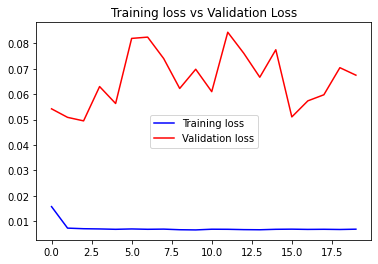

In [52]:
#training loss and validation loss in the dataset
training_loss = model.history['loss']
valid_loss = model.history['val_loss']
epochs = range(len(valid_loss))

#plotting 
plt.figure()
plt.plot(epochs, training_loss, 'b', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title("Training loss vs Validation Loss")
plt.legend()
plt.show()

In [79]:

df = pd.DataFrame(train)
df1 = pd.DataFrame(test)
test_60 = df.tail(60)
dataframe = test_60.append(df1, ignore_index = True)
test_scale = scaler.transform(dataframe)
test_scale = pd.DataFrame(test_scale)


In [195]:
y_pred = regressor.predict(x_test)
y_pred = y_pred.reshape((y_pred.shape[0],-1), order='F')
y_test_1 = y_test
y_new_pred = []
y_test_1 = scaler.inverse_transform(y_test)
for i in range(len(y_test_1)):
    y_test_1[i] = y_test_1[i] / 4
y_pred = scaler.inverse_transform(y_pred)
for i in range(y_pred.shape[0]):
    y_new_pred.append(y_pred[i][25])
print(y_test_1.shape)
print(y_new_pred)

(30, 1)
[7202.934, 7337.785, 7384.425, 7565.6157, 7119.2773, 6977.268, 7604.2524, 7428.2725, 7216.832, 7303.87, 7298.6104, 7184.275, 7131.2896, 7404.704, 7054.8145, 7467.6978, 7497.3105, 7115.916, 7405.6704, 7655.8247, 8150.378, 7333.7935, 7698.2114, 7655.1143, 7508.6304, 7841.8135, 7833.1777, 7361.3003, 7892.2856, 8122.1426]


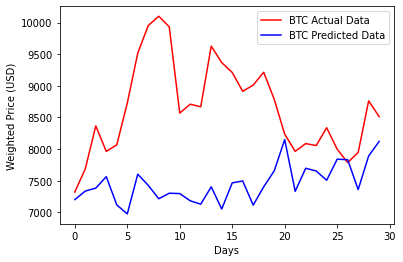

In [200]:
#finally we plot the 2 datasets
plt.plot(y_test_1, color = 'red', label = "BTC Actual Data")
plt.plot(y_new_pred, color = 'blue', label = "BTC Predicted Data")
plt.xlabel('Days')
plt.ylabel('Weighted Price (USD)')
plt.legend()
plt.show()